<a href="https://colab.research.google.com/github/sadikinisaac/general2/blob/master/finance_simplereturns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Description: This is a python program for finance. 
#             This program will show you how to compute portfolio simple returns, 
#             get daily returns and volatility etc.

In [0]:
# Import the libraries
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
# Get the stock symbols in your portfolio, 
# using FAANG for the portfolio stock
# FAANG is an acronym for the market's five most popular and best-performing tech stocks 
#   (Facebook, Amazon, Apple, Netflix, & Google)
stockSymbols = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [0]:
#Get the stock starting date
stockStartDate = '2013-01-01'

In [4]:
# Get todays date and format it in the form YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')

print(today)

2020-02-16


In [5]:
# Get the number of assests in the portfolio
numAssets = len(stockSymbols)
# Print the number of assests in your portfolio
print('You have '+ str(numAssets)+ ' assets in your portfolio')

You have 5 assets in your portfolio


In [0]:
# Create a function to get the stock price(s) of the portfolio
def getMyPortfolio(stocks= stockSymbols, start = stockStartDate, end = today, col='Adj Close'):
    #data = web.get_data_yahoo(stocks, start = start, end = end)[col]
    data =  web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
    return data

In [7]:
# Get the stock portfolio Adj. Close price and store it into my_stocks variable
my_stocks = getMyPortfolio(stockSymbols)
# Show my stocks
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.687538,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.820526,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.931404,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.543602,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.719994,13.880000,365.280823
...,...,...,...,...,...
2020-02-10,213.059998,2133.909912,321.549988,371.070007,1508.680054
2020-02-11,207.190002,2150.800049,319.609985,373.690002,1508.790039
2020-02-12,210.759995,2160.000000,327.200012,380.010010,1518.270020


In [0]:
# Create a function to visualize the portfolio
def showGraph(stocks= stockSymbols,start=stockStartDate, end=today, col='Adj Close'):
  
  # Create the title 'Portfolio (High,	Low,	Open,	Close,	Volume,	Adj Close) Price History
  title = 'Portfolio ' + col + ' Price History'
  #Get the stocks
  my_stocks = getMyPortfolio(stocks= stocks, start=start, end=end, col = col)
  
  # Visualize the price history
  plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5in 
  # Loop through each stock and plot the Adj Close for each day
  for c in my_stocks.columns.values:
    plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
  
  plt.title(title)
  plt.xlabel('Date',fontsize=18)
  plt.ylabel(col +' Price USD ($)',fontsize=18)
  plt.legend(my_stocks.columns.values, loc='upper left')
  plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


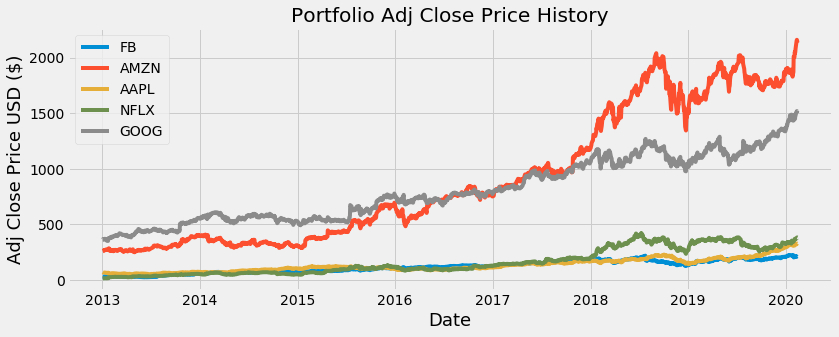

In [9]:
# Show the adjusted close price of FAANG and see how the stocks compare with each other
showGraph(stockSymbols)

In [10]:
# Calculate Simple Returns
daily_simple_returns = my_stocks.pct_change(1) # 1 for ONE DAY lookback for each individual return  NOTE:simple return = new/old - 1
# monthly_simple_returns = my_stocks.pct_change(21) # 21 for ONE MONTH lookback for each individual return
# annual_simple_returns = my_stocks.pct_change(253) # 253 for ONE YEAR lookback for each individual return
# Show the daily simple returns
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2020-02-10,0.003438,0.026273,0.004750,0.011724,0.019909
2020-02-11,-0.027551,0.007915,-0.006033,0.007061,0.000073
2020-02-12,0.017231,0.004277,0.023748,0.016912,0.006283


In [11]:
# Show the stock correlation
# Covariance and correlation are two mathematical concepts which are commonly used in statistics. 
# When comparing data samples from different populations, 
# covariance is used to determine how much two random variables vary together 
# (the directional relationship between two asset prices),
# whereas correlation is used to determine when a change in one variable can result in a change in another.

# A correlation value of 1 means two stocks have a perfect positive correlation. If one stock moves up while the other goes down,
# they would have a perfect negative correlation, noted by a value of -1

# The correlation will always have a measurement value between -1 and 1, and it adds a strength value on how the stocks move together. ... In short, covariance tells you that two variables change 
# the same way while correlation reveals how a change in one variable affects a change in the other.
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.470457,0.346002,0.315710,0.491502
AMZN,0.470457,1.000000,0.367691,0.405490,0.578577
AAPL,0.346002,0.367691,1.000000,0.201108,0.425905
NFLX,0.315710,0.405490,0.201108,1.000000,0.391932
GOOG,0.491502,0.578577,0.425905,0.391932,1.000000


In [12]:
# Show the covariance matrix for simple returns
# Covariance is an important measurement used in modern portfolio theory.
# Modern Portfolio Theory attempts to determine an efficient frontier 
# (The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return.) for a mix of assets in a portfolio. 
# The efficient frontier seeks to optimize the maximum return versus the degree of risk for the overall combined assets 
# in the portfolio.

# Covariance can tell how the stocks move together
# The diagonal entries of the covariance matrix are the variances and the other entries are the covariances
# The covariance of two stocks tells you how likely they are to increase or decrease simultaneously.

# Variance (σ^2) in statistics is a measurement of the spread between numbers in a data set. 
# It measures how far each number in the set is from the mean and therefore from every other number in the set. 
# In finance variance is a measure of dispersion and, most of the time variance is a synonym for risk. 
# The higher the variance of an asset price, the higher risk the asset bears along with a higher return and a higher volatility
# The lower the variance of an asset price, the lower risk the asset bears along with a lower return and a lower volatility

# Variance measures the stocks volatility if you take the square root, e.g. sqrt(variance) = σ = volatility = standard deviation
# NOTE: Volatility is the degree of variation of a trading price series over time as measured by the standard deviation of logarithmic returns.
# Show the covariance matrix for simple returns
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000418,0.000178,0.000111,0.000186,0.000147
AMZN,0.000178,0.000342,0.000107,0.000216,0.000157
AAPL,0.000111,0.000107,0.000247,0.000091,0.000098
NFLX,0.000186,0.000216,0.000091,0.000829,0.000166
GOOG,0.000147,0.000157,0.000098,0.000166,0.000215


In [13]:
# Show the variance
daily_simple_returns.var()

Symbols
FB      0.000418
AMZN    0.000342
AAPL    0.000247
NFLX    0.000829
GOOG    0.000215
dtype: float64

In [14]:
# Print the standard deviation σ (or volatility or sqrt(variance)) for daily simple returns 
print("The Stock Volatility:")
daily_simple_returns.std()

The Stock Volatility:


Symbols
FB      0.020437
AMZN    0.018494
AAPL    0.015730
NFLX    0.028793
GOOG    0.014673
dtype: float64

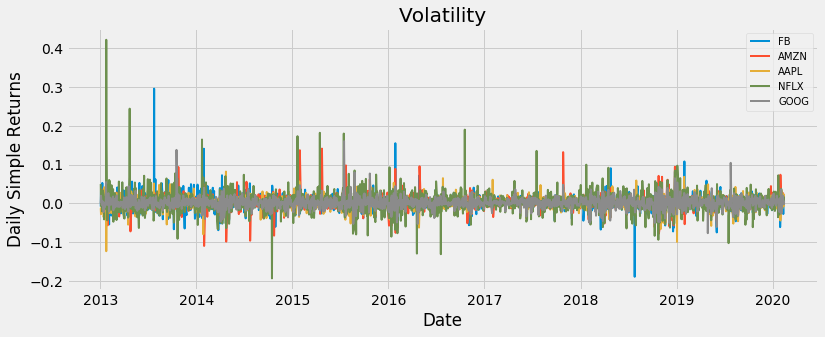

In [15]:
# Visualize the stocks daily simple returns / volatility and see how the stocks compare to each other
plt.figure(figsize=(12,4.5)) #Set the figure size (width, height)

# Loop through each stock and plot the simple returns for each day
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)

# Place the legend in the upper left corner with font size of 10
plt.legend(loc='upper right', fontsize=10) 

plt.title('Volatility')
plt.ylabel('Daily Simple Returns') #Label the Y-axis simple returns 
plt.xlabel('Date')
plt.show()

In [16]:
# Show the mean / average of the daily simple return
dailyMeanSimpleReturns = daily_simple_returns.mean() 

# Print the daily mean simple return
print("The daily mean simple return: ")
print(dailyMeanSimpleReturns)

The daily mean simple return: 
Symbols
FB      0.001341
AMZN    0.001351
AAPL    0.000992
NFLX    0.002278
GOOG    0.000910
dtype: float64


In [17]:
# Calculate the expected portfolio daily performance with random weights 
# [0.4, 0.1, 0.3,0.1,0.1] => 40% FB, 10% AMZN, 30% AAPL, 10% NFLX, 10% GOOG
randomWeights = np.array([0.4, 0.1, 0.3,0.1,0.1])
portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns*randomWeights) #NOTE: Be sure to account for rounding of decimal

# Print the daily expected portfolio return
print("The daily expected portfolio return: " +str(portfolioSimpleReturn))

The daily expected portfolio return: 0.001288013406246585


In [18]:
# Get the yearly simple return, we multiply by 253 instead of 365 because their are approximately 253 trading days in a year
# The NYSE and NASDAQ average about 252 or 253 trading days a year. In 2018 there were 252 trading days in 2020 there will be 253.
# This is from 365.25 (days on average per year) * 5/7 (proportion work days per week) - 6 (weekday holidays) - 3*5/7 (fixed date holidays) = 252.75 ≈ 253. 
# Print the expected annual portfolio simple return
print("Expected annualised portfolio simple return : "+ str(portfolioSimpleReturn * 253))

Expected annualised portfolio simple return : 0.325867391780386


In [19]:
# Calculate the growth of our investment or in other words,
# calculate the total returns from our investment,to do this we need to calculate the cumulative returns 
# from that investment. 
# The Daily cumulative simple return for n-periods:
#    The simple return from period_1 + 1 times the simple return from period_2 + 1 times ... the simple return from period_n
#    (1+simple_return_1) * (1+simple_return_2) * ... *(1+simple_return_n)
#    Example: (daily_simple_returns["GOOG"][1] + 1) * (daily_simple_returns["GOOG"][2] + 1) = 1.020353
#                    0.000581 * 0.019760 =  1.020353
dailyCumulSimplReturn = (daily_simple_returns+1).cumprod()
# Show the cumulative simple return
dailyCumulSimplReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987377,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959874,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954228,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956796,1.055972,1.013896
...,...,...,...,...,...
2020-02-10,7.609286,8.293148,4.681344,28.230518,4.187584
2020-02-11,7.399643,8.358789,4.653100,28.429844,4.187889
2020-02-12,7.527143,8.394544,4.763601,28.910662,4.214202


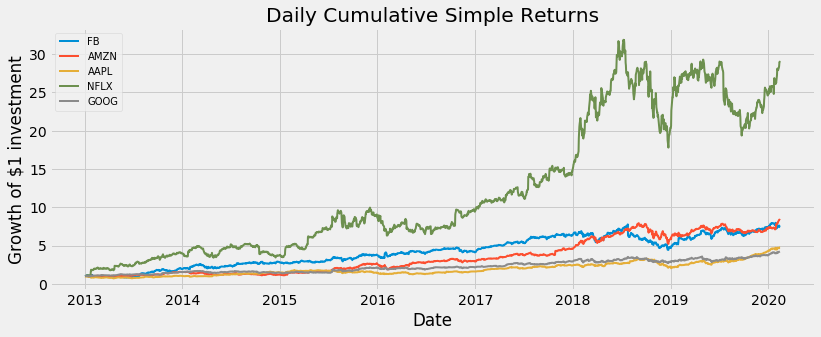

In [20]:
# Visualize the daily cumulative simple returns
fig = plt.figure(figsize=(12.2,4.5))
for c in dailyCumulSimplReturn.columns.values:
  plt.plot(dailyCumulSimplReturn.index, dailyCumulSimplReturn[c], lw=2, label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)

# Place the legend in the upper left corner with font size of 10
plt.legend(loc='upper left', fontsize=10) 
plt.xlabel("Date")
plt.ylabel("Growth of $1 investment")
plt.title("Daily Cumulative Simple Returns")
plt.show()